# Machine Learning Approach 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
mpg_df = pd.read_csv('/content/mpg.csv')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
mpg_df = mpg_df.drop('name', axis=1)
mpg_df['origin'] = mpg_df['origin'].replace({1:'america', 2:'europe', 3:'asia'})
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [4]:
mpg_df = pd.get_dummies(mpg_df, columns=['origin'], drop_first=True)

In [5]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [6]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [7]:
mpg_df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [10]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [11]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x : x.fillna(x.median()), axis=0)

In [15]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


In [14]:
mpg_df['horsepower'] = pd.to_numeric(mpg_df['horsepower'])

In [16]:
x = mpg_df.drop('mpg', axis=1)
y = mpg_df[['mpg']]

In [17]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0


In [18]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaler_x, y, test_size=0.2, random_state=1)

In [24]:
x_train1 = pd.DataFrame(x_train)
x_test1 = pd.DataFrame(x_test)

In [25]:
y_train1 = pd.DataFrame(y_train)
y_test1 = pd.DataFrame(y_test)

# Linear Regression

In [28]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
#for idx, col_name in enumerate(x_train1.columns):
#  print("The coefficient for {} id {}".format(col_name, regression_model.coef_[0][idx]))

LinearRegression()

In [27]:
regression_model.intercept_

array([23.51019009])

In [29]:
regression_model.coef_

array([[-0.51072715,  2.44069946, -0.68494874, -5.88675532,  0.28880561,
         3.05896376,  1.07299231,  1.08036618]])

In [30]:
# Creating Ridge regularization
ridge = Ridge(alpha=.3)
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [31]:
ridge.coef_

array([[-0.48568005,  2.3423919 , -0.69387387, -5.81972716,  0.27582324,
         3.05010754,  1.0663768 ,  1.06964322]])

In [36]:
# Creating Lasso regularization
lasso = Lasso(alpha=.5)
lasso.fit(x_train, y_train)

Lasso(alpha=0.5)

In [37]:
lasso.coef_

array([-0.        , -0.        , -0.21321885, -4.95599286,  0.        ,
        2.54443052,  0.18393132,  0.08905873])

In [39]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.795859004463252
0.8557952364287235


In [40]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8143682953093296
0.8648106635132776


In [41]:
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.8143785617196869
0.864772965302679


# Deep Learning Model

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

In [52]:
from sklearn.datasets import make_moons

In [53]:
x, y = make_moons(100, noise=0.25, random_state=2)

In [46]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

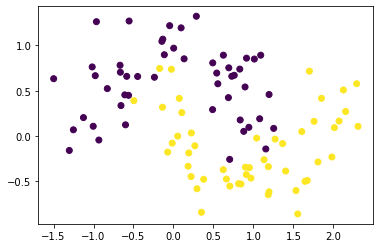

In [54]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [55]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [56]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model.fit(x, y, epochs=2000, validation_split=0.2,verbose=0)

3888/3888 [==============================] - 6s 2ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


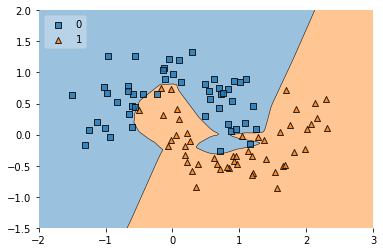

In [57]:
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

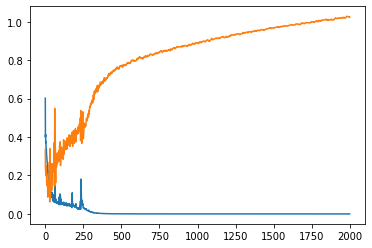

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [61]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model1.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [62]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model1.fit(x, y, epochs=2000, validation_split=0.2,verbose=0)

3888/3888 [==============================] - 44s 11ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


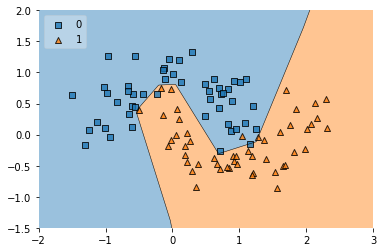

In [63]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

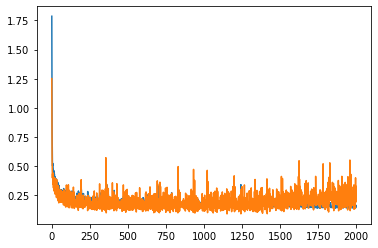

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])